**CART (Ağaca Dayalı) Regresyon Modeli**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [7]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

**Model & Tahmin İşlemleri**

In [8]:
cart_model = DecisionTreeRegressor()

In [9]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

/Users/mohammadqasemmuzafarzada/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Maaş (salary)')

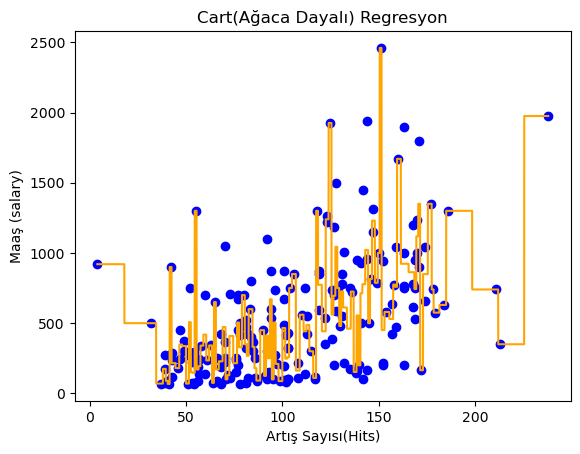

In [10]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_grid, cart_model.predict(X_grid), color = 'orange')

plt.title('Cart(Ağaca Dayalı) Regresyon')
plt.xlabel('Artış Sayısı(Hits)')
plt.ylabel('Maaş (salary)')

In [12]:
cart_model.predict(X_test)[0:10]

array([ 725.        , 1230.        ,  725.        ,  504.1665    ,
         67.5       ,  228.66666667,  863.05566667,  787.5       ,
        759.1665    ,  472.5       ])

**Tek Değişkenli Hata**

In [14]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

**Çok Değişkenli Hata**

In [15]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [16]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [17]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

540.0018335210876

**Tuning Model**

In [18]:
cart_model

DecisionTreeRegressor()

In [23]:
cart_model = DecisionTreeRegressor(max_depth= 2).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

417.00487927726425

In [25]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=2)
File:        ~/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Erro

In [26]:
cart_params = {"max_depth": [2, 3, 4, 5, 10, 20],
             "min_samples_split": [2, 20, 5, 30, 40,60]}

In [27]:
cart_model = DecisionTreeRegressor()

In [28]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 2).fit(X_train, y_train)

In [29]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 20}

In [30]:
cart_tuned = DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(X_train, y_train)

In [31]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511435